In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS


In [2]:
#Loading dataset
df=pd.read_csv('balanced_dataset.csv')
df.head()

,Score,Text,review_length
0,1,This stuff only got 1 star because there is no...,203
1,1,For starters this lid does not fit. It is sup...,998
2,1,"Being a cinnamon candy nut at Valentines, I wa...",402
3,1,Spearmint Altoids were my favorite for years. ...,367
4,1,I normally order senseo pods for my on cup cof...,214


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Score          25000 non-null  int64 
 1   Text           25000 non-null  object
 2   review_length  25000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 586.1+ KB


In [4]:
# Checking Null Values
df.isna().sum()

Score            0
Text             0
review_length    0
dtype: int64

In [5]:

# nlp = spacy.load("en_core_web_sm")
# nlp.max_length = 10_000_000   # slightly above your text length

# # Regex patterns
# url_pattern = r"https?://\S+|www\.\S+"
# html_pattern = r"<.*?>"
# emoji_pattern = r"[\U00010000-\U0010ffff]|[\u263a-\U0001f645]"
# special_pattern = r"[^a-zA-Z0-9\s]"

# def clean_basic(text):

#     text = text.lower()

#     text = re.sub(url_pattern, " ", text)

#     text = re.sub(html_pattern, " ", text)

#     text = re.sub(emoji_pattern, " ", text)

#     text = re.sub(special_pattern, " ", text)

#     doc = nlp(text)
#     tokens = [token.lemma_ for token in doc if token.text not in STOP_WORDS and len(token.text) > 1]

#     cleaned = " ".join(tokens)
#     return cleaned


import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop = ENGLISH_STOP_WORDS

url_re = re.compile(r"https?://\S+|www\.\S+")
html_re = re.compile(r"<.*?>")
emoji_re = re.compile(r"[\U00010000-\U0010ffff]|[\u263a-\U0001f645]")
special_re = re.compile(r"[^a-zA-Z0-9\s]")

def clean_basic(text):
    text = text.lower()
    text = url_re.sub(" ", text)
    text = html_re.sub(" ", text)
    text = emoji_re.sub(" ", text)
    text = special_re.sub(" ", text)

    words = text.split()
    words = [w for w in words if w not in stop and len(w) > 1]

    return " ".join(words)


In [6]:
df["cleaned_text"] = df["Text"].apply(clean_basic)


In [7]:
# text = " ".join(df['cleaned_text'].astype(str).tolist())   # if using full dataset
# doc = nlp(text)


In [8]:
# from spacy.lang.en.stop_words import STOP_WORDS
# # stopwords_found = [token.text for token in doc if token.text in STOP_WORDS]
# # print(stopwords_found)

# unique_stops = set([token.text for token in doc if token.text in STOP_WORDS])
# print(unique_stops)
# print(len(unique_stops))   # how many unique stopwords occurred

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

STOPWORDS = ENGLISH_STOP_WORDS

all_text = " ".join(df["cleaned_text"])

words = all_text.split()

unique_stops = {w for w in words if w in STOPWORDS}


In [9]:
df

,Score,Text,review_length,cleaned_text
0,1,This stuff only got 1 star because there is no...,203,stuff got star option zero stars line nasty te...
1,1,For starters this lid does not fit. It is sup...,998,starters lid does fit supposed held little bum...
2,1,"Being a cinnamon candy nut at Valentines, I wa...",402,cinnamon candy nut valentines pretty excited l...
3,1,Spearmint Altoids were my favorite for years. ...,367,spearmint altoids favorite years local stores ...
4,1,I normally order senseo pods for my on cup cof...,214,normally order senseo pods cup coffey maker de...
...,...,...,...,...
24995,5,We simply LOVE this iced tea! We drink regular...,1122,simply love iced tea drink regular tetley iced...
24996,5,"As a former Canadian, I have truly missed my T...",299,canadian truly missed tim hortons coffee glad ...
24997,5,I just received my suckers today and they are ...,479,just received suckers today really good breakd...
24998,5,I will give it 10 stars and thank goodness tha...,480,10 stars thank goodness ve narrowed field just...


In [10]:
# filtering words
def filter_review(text, min_words=3, max_words=250):
    words = text.split()

    if len(words) < min_words:
        return False
    if len(words) > max_words:
        return False
    
    return True


In [11]:
# df_original = df.copy()
df_filtered = df[df["cleaned_text"].apply(filter_review)]


In [12]:
df_filtered

,Score,Text,review_length,cleaned_text
0,1,This stuff only got 1 star because there is no...,203,stuff got star option zero stars line nasty te...
1,1,For starters this lid does not fit. It is sup...,998,starters lid does fit supposed held little bum...
2,1,"Being a cinnamon candy nut at Valentines, I wa...",402,cinnamon candy nut valentines pretty excited l...
3,1,Spearmint Altoids were my favorite for years. ...,367,spearmint altoids favorite years local stores ...
4,1,I normally order senseo pods for my on cup cof...,214,normally order senseo pods cup coffey maker de...
...,...,...,...,...
24995,5,We simply LOVE this iced tea! We drink regular...,1122,simply love iced tea drink regular tetley iced...
24996,5,"As a former Canadian, I have truly missed my T...",299,canadian truly missed tim hortons coffee glad ...
24997,5,I just received my suckers today and they are ...,479,just received suckers today really good breakd...
24998,5,I will give it 10 stars and thank goodness tha...,480,10 stars thank goodness ve narrowed field just...


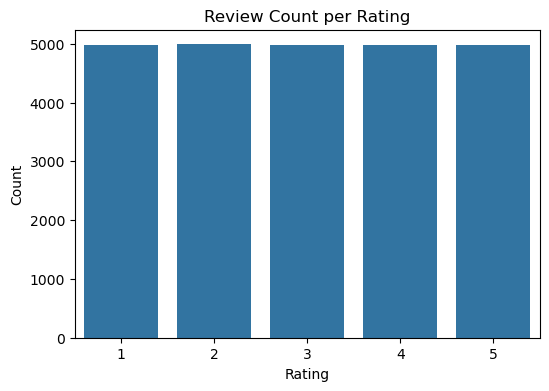

In [13]:
# visualization
# bar plot
plt.figure(figsize=(6,4))
sns.countplot(x="Score", data=df_filtered)
plt.title("Review Count per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

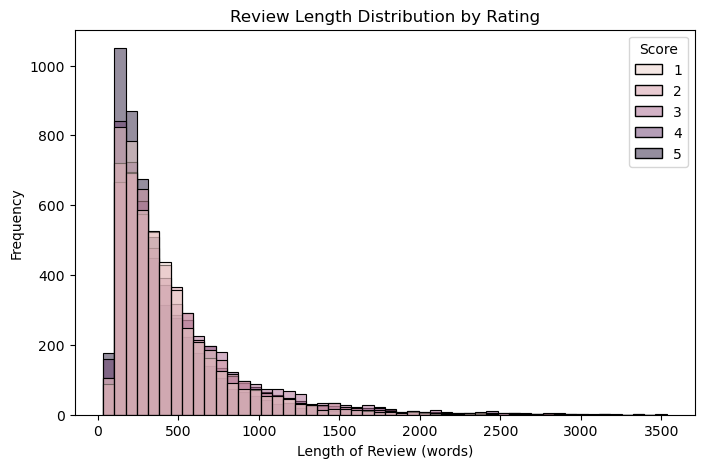

In [14]:
#Histogram: Word Count Distribution by Rating
plt.figure(figsize=(8,5))
sns.histplot(data=df_filtered, x="review_length", hue="Score", bins=50)
plt.title("Review Length Distribution by Rating")
plt.xlabel("Length of Review (words)")
plt.ylabel("Frequency")
plt.show()

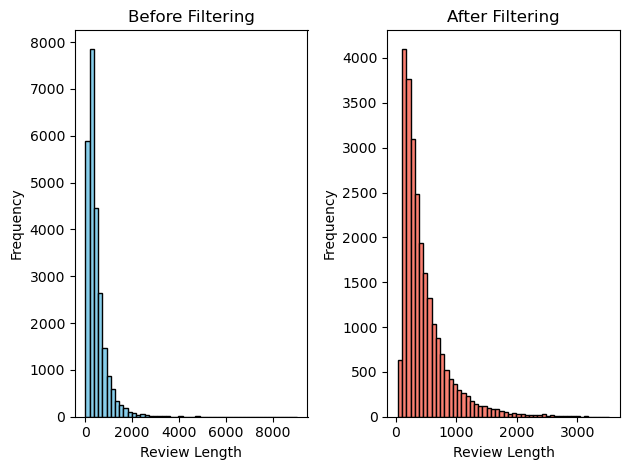

In [15]:
plt.subplot(1,2,1)
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title("Before Filtering")
plt.xlabel("Review Length")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(df_filtered['review_length'], bins=50, color='salmon', edgecolor='black')
plt.title("After Filtering")
plt.xlabel("Review Length")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [16]:
#Display 3–10 Sample Reviews per Rating
def show_samples(df, n=5):
    for rating in sorted(df_filtered["Score"].unique()):
        print("\n" + "="*40)
        print(f"Rating: {rating} | Showing {n} sample reviews")
        print("="*40)
        
        samples = df[df["Score"] == rating].sample(n, random_state=42)
        
        for i, row in samples.iterrows():
            print(f"\nReview {i}:")
            print(row["cleaned_text"])  


In [17]:
show_samples(df_filtered, n=10)



Rating: 1 | Showing 10 sample reviews

Review 1132:
great product snack 12 2oz 34 rip walmart expensive site

Review 3683:
far sweet make things sugary bought deal added cider vinegar make dressing sweet threw away

Review 1044:
far packages filled defective cups brewing cup separates coffee spills place happy

Review 2078:
like idea getting grains cat food using peas instead doesn answer carnivores cat doesn tolerate peas vomiting began weeks instantaneous eat cat food right throwing chicken salmon waste money disappointing

Review 1379:
kind shocked coffee lightest roasted coffee didnt expresso taste

Review 2779:
cats won eat kept weeks starve ate survive

Review 3110:
boy dissapointed babies thought taste like actually puff tasted like honestly love pirates booty favorite going stick taste like weark version pirates booty flavor speak worth money buy bag store try purchasing online large dont expect flavor form snack unless eating flavorless food

Review 2891:
think simple yellow 

In [18]:
df_filtered['Score'].value_counts()


Score
2    4989
4    4984
3    4984
1    4982
5    4978
Name: count, dtype: int64

In [19]:
#splitting into equal counts(5000)
df_balanced = df_filtered.groupby('Score').sample(n=4978, random_state=42)
df_balanced

,Score,Text,review_length,cleaned_text
1132,1,"First off,these are a great product and snack ...",167,great product snack 12 2oz 34 rip walmart expe...
3683,1,It;s far too sweet why do they make things too...,163,far sweet make things sugary bought deal added...
1044,1,"So far, at least one of the packages is filled...",175,far packages filled defective cups brewing cup...
2078,1,I like the idea of getting grains out of cat f...,347,like idea getting grains cat food using peas i...
1379,1,Kind of shocked that the coffee was the lighte...,117,kind shocked coffee lightest roasted coffee di...
...,...,...,...,...
21527,5,This sauce is used at a local steakhouse and m...,195,sauce used local steakhouse fiance love hot gr...
20723,5,This was a great deal on one of the best tasti...,117,great deal best tasting seasonings use dishes ...
20649,5,My family is from Holland so we enjoy many Dut...,648,family holland enjoy dutch german foods recent...
23339,5,"Years ago, there used to be bacon and cheddar ...",413,years ago used bacon cheddar popcorn topping d...


In [20]:
df_balanced['Score'].value_counts()

Score
1    4978
2    4978
3    4978
4    4978
5    4978
Name: count, dtype: int64

In [21]:
x = df_balanced['Text']   #(f)
y = df_balanced['Score']  #(t)
x.head()

1132    First off,these are a great product and snack ...
3683    It;s far too sweet why do they make things too...
1044    So far, at least one of the packages is filled...
2078    I like the idea of getting grains out of cat f...
1379    Kind of shocked that the coffee was the lighte...
Name: Text, dtype: object

In [22]:
y.head()

1132    1
3683    1
1044    1
2078    1
1379    1
Name: Score, dtype: int64

In [23]:
# Splitting into Train and Test
from sklearn.model_selection import train_test_split
x_train_balanced , x_test_balanced , y_train_balanced , y_test_balanced = train_test_split(x, y,test_size=0.30,random_state=42,stratify=y)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=20000) #, stop_words='english'

x_train_vect = vectorizer.fit_transform(x_train_balanced)
x_test_vect = vectorizer.transform(x_test_balanced)


In [25]:
# import joblib
# joblib.dump(vectorizer, "tfidf.pkl")

In [26]:
print("Training data shape:", x_train_vect.shape)
print("Test data shape:", x_test_vect.shape)


Training data shape: (17423, 20000)
Test data shape: (7467, 20000)


# Logistic Regression


In [27]:

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver='newton-cg') #max_iter=1000,random_state=42
# logit = LogisticRegression(
#     solver='lbfgs',
#     C=0.7,     # stronger regularization
#     max_iter=2000
# )
#logit = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=2000)


logit.fit(x_train_vect,y_train_balanced)

LogisticRegression(solver='newton-cg')

In [28]:
y_pred_train = logit.predict(x_train_vect)
y_pred_test = logit.predict(x_test_vect)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("train:",accuracy_score(y_train_balanced,y_pred_train))
print("test:",accuracy_score(y_test_balanced,y_pred_test))

train: 0.7991161108879068
test: 0.5109146913084237


In [30]:
print("train:",classification_report(y_train_balanced,y_pred_train))
print("test:",classification_report(y_test_balanced,y_pred_test))

train:               precision    recall  f1-score   support

           1       0.81      0.87      0.84      3484
           2       0.80      0.76      0.78      3485
           3       0.77      0.74      0.76      3485
           4       0.80      0.76      0.78      3484
           5       0.81      0.87      0.84      3485

    accuracy                           0.80     17423
   macro avg       0.80      0.80      0.80     17423
weighted avg       0.80      0.80      0.80     17423

test:               precision    recall  f1-score   support

           1       0.59      0.65      0.62      1494
           2       0.43      0.38      0.40      1493
           3       0.42      0.41      0.41      1493
           4       0.47      0.44      0.46      1494
           5       0.61      0.68      0.64      1493

    accuracy                           0.51      7467
   macro avg       0.50      0.51      0.51      7467
weighted avg       0.50      0.51      0.51      7467



# Randomforest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
                            
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1)
rf.fit(x_train_vect,y_train_balanced)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [32]:
y_pred_train_1 = rf.predict(x_train_vect)
y_pred_test_1 = rf.predict(x_test_vect)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("train:",accuracy_score(y_train_balanced,y_pred_train_1))
print("test:",accuracy_score(y_test_balanced,y_pred_test_1))

train: 1.0
test: 0.4829248694254721


In [34]:
print("train:",classification_report(y_train_balanced,y_pred_train_1))
print("test:",classification_report(y_test_balanced,y_pred_test_1))

train:               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3484
           2       1.00      1.00      1.00      3485
           3       1.00      1.00      1.00      3485
           4       1.00      1.00      1.00      3484
           5       1.00      1.00      1.00      3485

    accuracy                           1.00     17423
   macro avg       1.00      1.00      1.00     17423
weighted avg       1.00      1.00      1.00     17423

test:               precision    recall  f1-score   support

           1       0.54      0.66      0.59      1494
           2       0.41      0.31      0.35      1493
           3       0.41      0.42      0.41      1493
           4       0.49      0.33      0.39      1494
           5       0.53      0.70      0.60      1493

    accuracy                           0.48      7467
   macro avg       0.47      0.48      0.47      7467
weighted avg       0.47      0.48      0.47      7467



# SVM

In [35]:
# from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(x_train_vect, y_train_balanced)

y_pred_svm = svm_model.predict(x_test_vect)

print("Accuracy:", accuracy_score(y_test_balanced, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_balanced, y_pred_svm))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Accuracy: 0.47850542386500605

Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.61      0.59      1494
           2       0.39      0.35      0.37      1493
           3       0.39      0.38      0.39      1493
           4       0.43      0.41      0.42      1494
           5       0.58      0.64      0.61      1493

    accuracy                           0.48      7467
   macro avg       0.47      0.48      0.47      7467
weighted avg       0.47      0.48      0.47      7467



# trail prediction

In [36]:
sample_text = [
    "bought package try ended garbage crackers weren bad powdery coating like cheddar flavoring sprayed flavor sour like spoiled milk left car kids know talking just sharp cheddar kind way cracker thicker firm exeted probably work dips spreads recommend blue diamond nut chips taste like smokey nuts going regular brown rice crackers try recommend cheddar"
]


In [37]:
sample_vect = vectorizer.transform(sample_text)


In [38]:
logit.predict(sample_vect)


array([2])

# saving the model

In [39]:
# import joblib

# joblib.dump(logit, "Model_A.pkl")  
from joblib import dump

dump(logit, "Model_A.pkl")
print("Model_A (balanced) saved")



Model_A (balanced) saved


# saving tfidf

In [40]:
from joblib import dump
dump(vectorizer, "tfidf_A.pkl")
print("TF-IDF saved successfully")


TF-IDF saved successfully


In [41]:
# df_balanced.to_csv(
#     "balanced_dataset_final.csv",
#     index=False
# )


In [42]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l2'],
#     'solver': ['liblinear']
# }

# grid_search = GridSearchCV(
#     estimator=LogisticRegression(max_iter=1000, random_state=42,class_weight='balanced'),
#     param_grid=param_grid,
#     cv=3,
#     scoring='f1_macro',
#     n_jobs=-1
# )
# grid_search = GridSearchCV(
#     LogisticRegression(
#         max_iter=300,
#         random_state=42,
#         class_weight='balanced'
#     ),
#     param_grid,
#     cv=3,
#     scoring='f1_macro',
#     n_jobs=-1
# )

# TRAIN (vectorized data)
# grid_search.fit(x_train_vect, y_train_balanced)

# print("Best Parameters:", grid_search.best_params_)
# print("Best CV Score:", grid_search.best_score_)

# best_model = grid_search.best_estimator_

# # TEST (vectorized data ONLY)
# test_accuracy = best_model.score(x_test_vect, y_test_balanced)
# print("Tuned Model Accuracy:", test_accuracy)



In [51]:
from sklearn.model_selection import GridSearchCV


models = {
    "Logistic Regression": (
        LogisticRegression(
            max_iter=1000,
            random_state=42,
            class_weight='balanced'
        ),
        {
            "C": [0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["liblinear"]
        }
    ),

    "Linear SVM": (
        LinearSVC(
            class_weight='balanced',
            random_state=42
        ),
        {
            "C": [0.1, 1, 10]
        }
    ),

    "Random Forest": (
        RandomForestClassifier(
            random_state=42,
            n_jobs=2,
            class_weight='balanced'
        ),
        {
           
           "n_estimators": [200, 400],
           "max_depth": [20, 40],
           "min_samples_split": [2, 10],
           "min_samples_leaf": [1, 5]

        }
    )
}
results = {}

for name, (model, params) in models.items():
    print(f"\n Training {name}:")

    grid = GridSearchCV(
        model,
        params,
        cv=3,
        scoring="f1_macro",
        n_jobs=2
    )

    grid.fit(x_train_vect, y_train_balanced)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test_vect)

    acc = accuracy_score(y_test_balanced, y_pred)

    results[name] = {
        "Best Params": grid.best_params_,
        "Best CV F1": grid.best_score_,
        "Test Accuracy": acc
    }

    print("Best Params:", grid.best_params_)
    print("Best CV F1:", grid.best_score_)
    print("Test Accuracy:", acc)


 Training Logistic Regression:
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV F1: 0.502329823847918
Test Accuracy: 0.5139949109414759

 Training Linear SVM:
Best Params: {'C': 0.1}
Best CV F1: 0.4999971566326224
Test Accuracy: 0.5145306013124414

 Training Random Forest:
Best Params: {'max_depth': 40, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best CV F1: 0.4541384052312381
Test Accuracy: 0.4790411142359716


In [44]:
# import joblib

# model_B = joblib.load("Model_B.pkl")
# print("Model_B loaded successfully!")
# tfidf_B = joblib.load("tfidf_B.pkl")
# print("TF-IDF_B loaded successfully!")

# tfidf_A = joblib.load("tfidf_A.pkl")
# print("TF-IDF_A loaded successfully!")


In [45]:
# x_test_imbalanced_loaded = df_filtered["Text"]
# y_test_imbalanced_loaded = df_filtered["Score"]

In [46]:
# # Imbalanced data
# X_imb_A = tfidf_A.transform(x_test_imbalanced_loaded)
# X_imb_B = tfidf_B.transform(x_test_imbalanced_loaded)

In [47]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# def evaluate(model, X, y, name):
#     print(f"\n===== {name} =====")
#     y_pred = model.predict(X)

#     print("Accuracy:", accuracy_score(y, y_pred))
#     print("\nClassification Report:\n", classification_report(y, y_pred))
#     print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))


In [48]:
# evaluate(model_B, X_imb_A, y_test_imbalanced_loaded,
#          "Model_A → Imbalanced")